In [1]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict

if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [2]:
env = BlackjackEnv()

In [3]:
def get_id_of_first_appearance(state, episode):
    for i in range(len(episode)):
        if state == episode[i][1]:
            return i

In [4]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Nubmer of episodes to sample.
        discount_factor: Lambda discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """

    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final value function
    V = defaultdict(float)
    
    print("MC prediction for: " + str(num_episodes) + " episodes...")
    # Implement this!    
    for i in range(num_episodes):
        if i % 10000 == 0:
            print("Episode: " + str(i))
        # an episode
        state = env.reset()
        done = False
        episode = []
        while not done:
            action = np.argmax(policy(state))
            next_state, reward, done, _ = env.step(action)
            episode.append((action, state, reward))
            state = next_state        
        states = set([tuple(x[1]) for x in episode])
        for state in states:
            first_app = get_id_of_first_appearance(state, episode)
            ret = sum([np.power(discount_factor,i)* x[2] for i,x in enumerate(episode[first_app:])])
            returns_sum[state] += ret
            returns_count[state] += 1.0
            V[state] = returns_sum[state] / returns_count[state]
    return V

In [5]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is > 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return np.array([1.0, 0.0]) if score >= 20 else np.array([0.0, 1.0])

MC prediction for: 10000 episodes...
Episode: 0


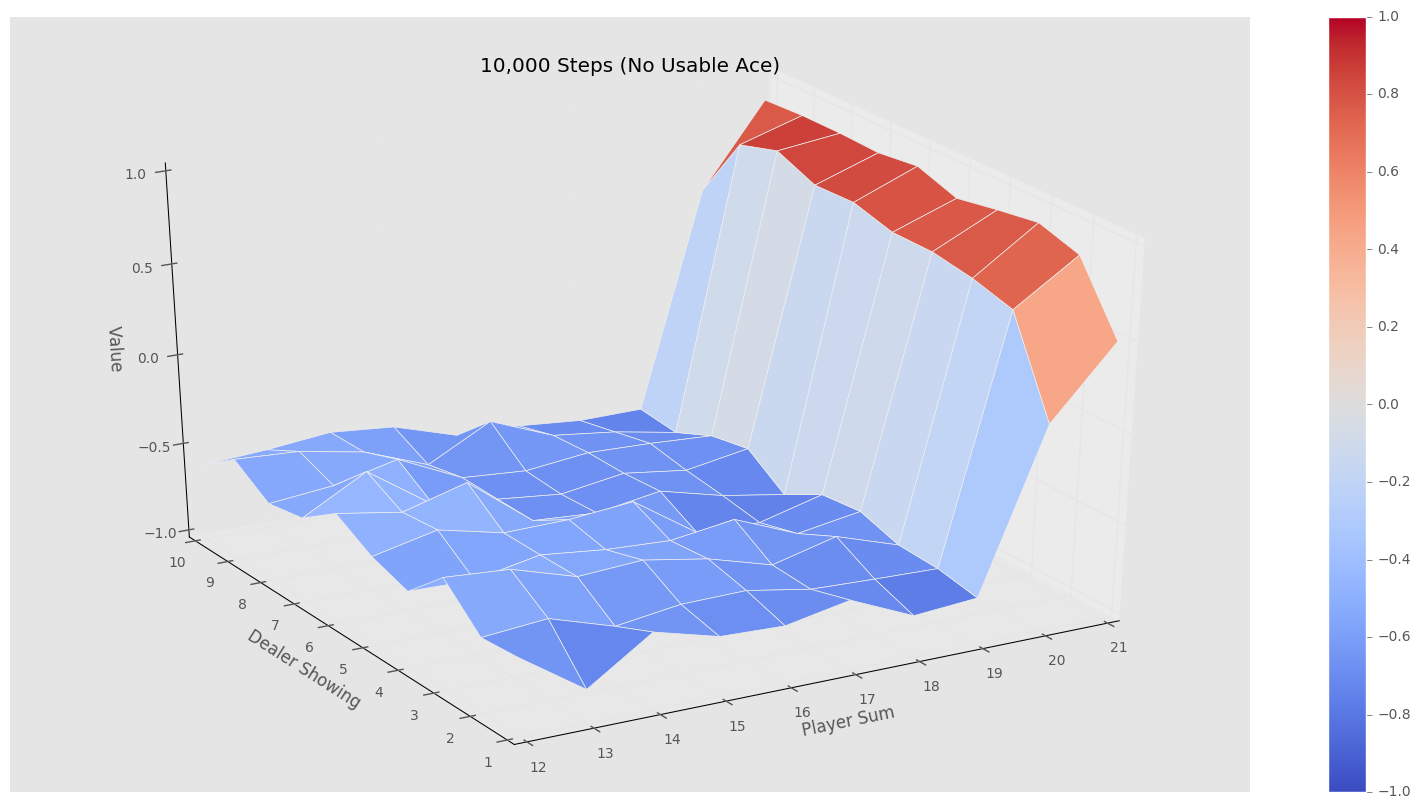

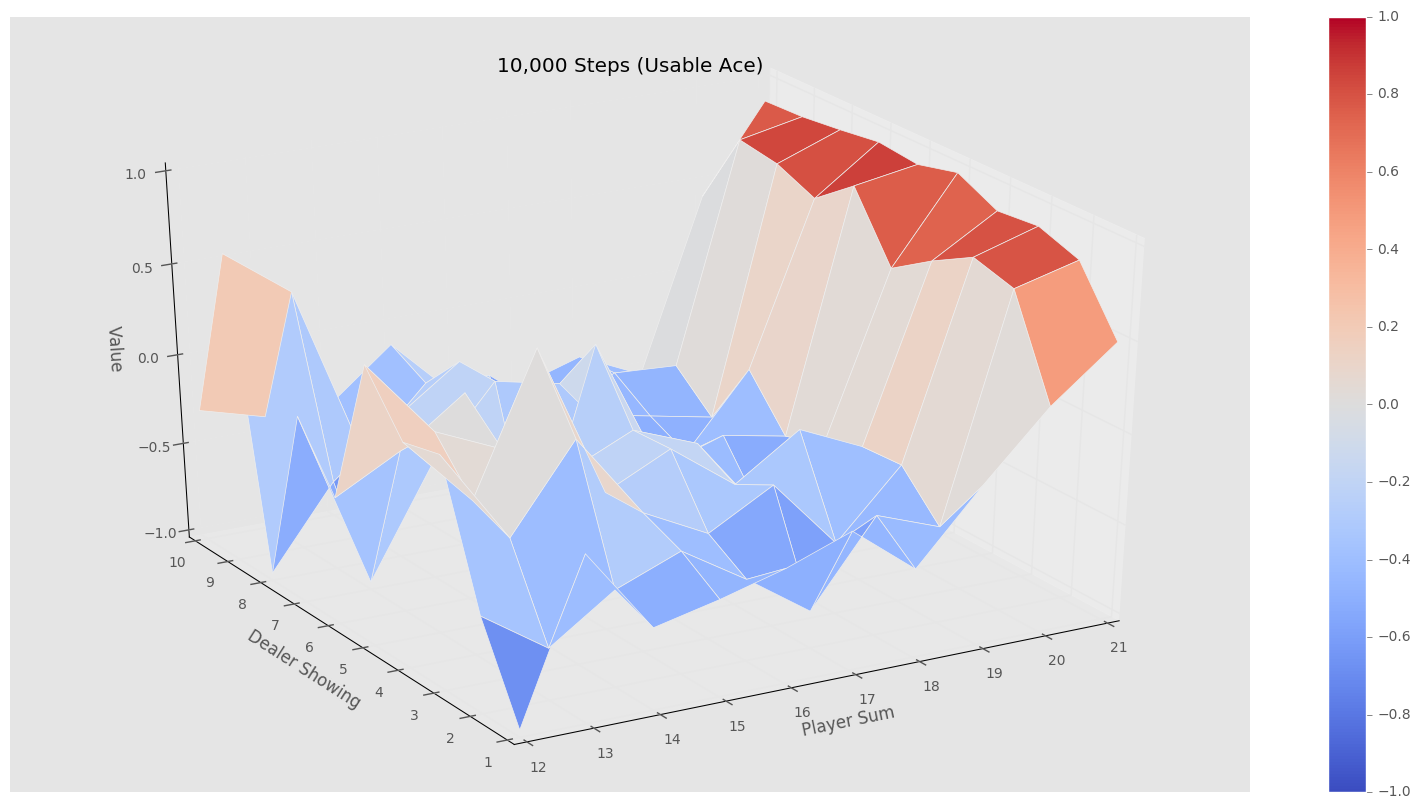

MC prediction for: 500000 episodes...
Episode: 0
Episode: 10000
Episode: 20000
Episode: 30000
Episode: 40000
Episode: 50000
Episode: 60000
Episode: 70000
Episode: 80000
Episode: 90000
Episode: 100000
Episode: 110000
Episode: 120000
Episode: 130000
Episode: 140000
Episode: 150000
Episode: 160000
Episode: 170000
Episode: 180000
Episode: 190000
Episode: 200000
Episode: 210000
Episode: 220000
Episode: 230000
Episode: 240000
Episode: 250000
Episode: 260000
Episode: 270000
Episode: 280000
Episode: 290000
Episode: 300000
Episode: 310000
Episode: 320000
Episode: 330000
Episode: 340000
Episode: 350000
Episode: 360000
Episode: 370000
Episode: 380000
Episode: 390000
Episode: 400000
Episode: 410000
Episode: 420000
Episode: 430000
Episode: 440000
Episode: 450000
Episode: 460000
Episode: 470000
Episode: 480000
Episode: 490000


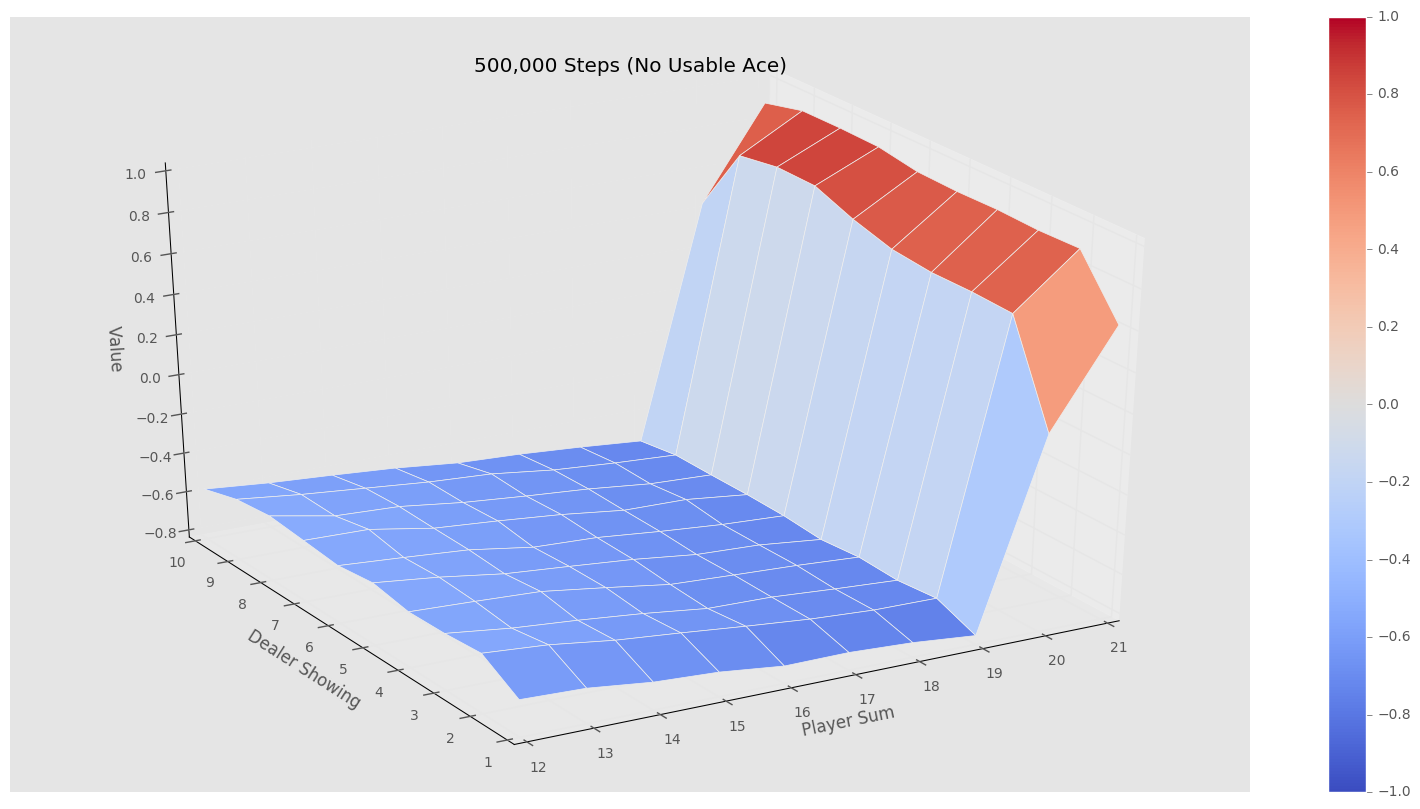

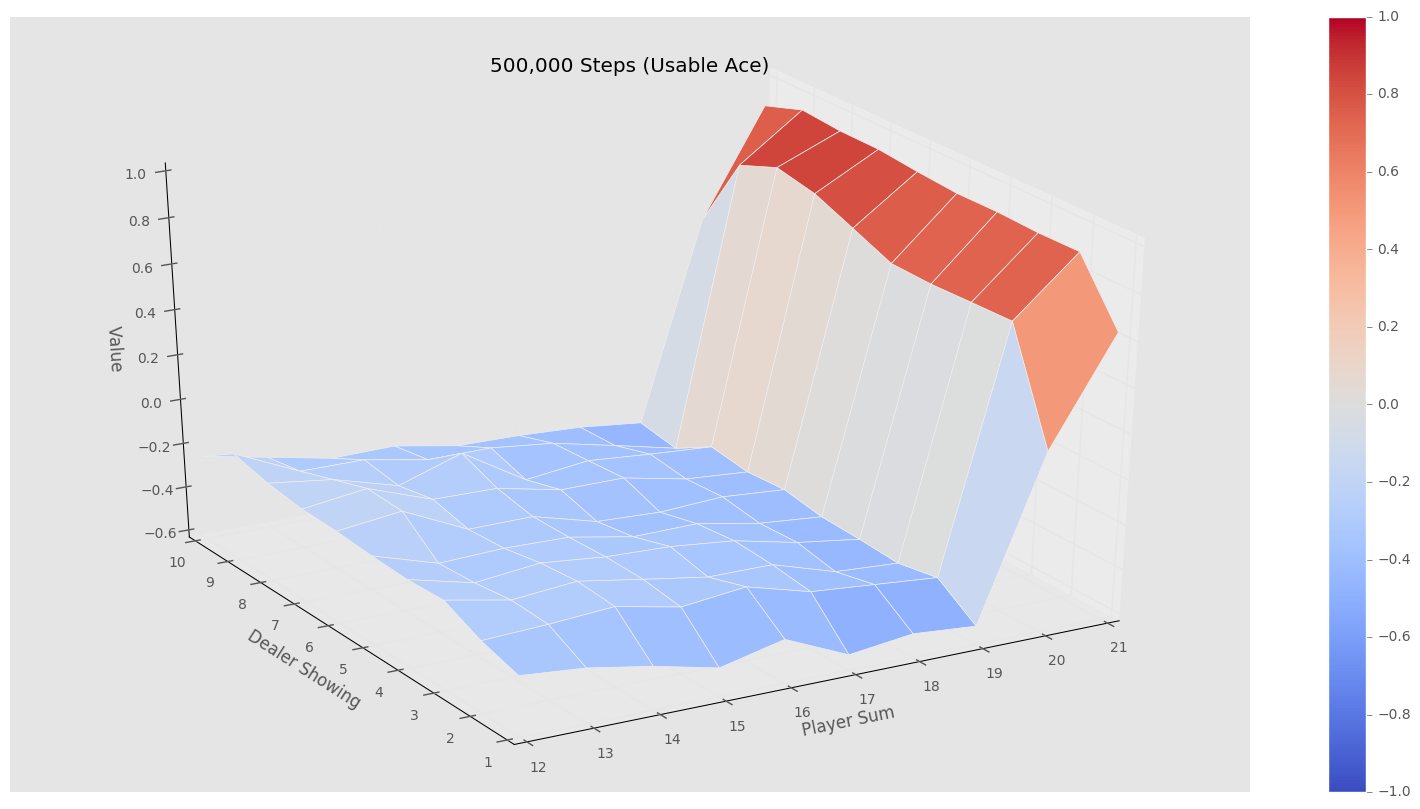

In [6]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps")